### Cholesterol level prediction

In [115]:
# Import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# loading datasets
df = pd.read_csv('BMI_Data.csv')
df.head()

,Date,Weight in Pounds,BMI,Cholesterol,Unnamed: 4,Unnamed: 5
0,1-Jul-93,201.38,85.35058,251,NaN,NaN
1,2-Jul-93,202.39,85.31267,255,NaN,NaN
2,3-Jul-93,188.84,85.13161,245,NaN,NaN
3,4-Jul-93,184.13,85.16573,236,NaN,NaN
4,5-Jul-93,192.51,85.15533,247,NaN,NaN


In [117]:
# Remove two unnamed columns
df=df[['Date','Weight in Pounds','BMI','Cholesterol']]
df.head()

,Date,Weight in Pounds,BMI,Cholesterol
0,1-Jul-93,201.38,85.35058,251
1,2-Jul-93,202.39,85.31267,255
2,3-Jul-93,188.84,85.13161,245
3,4-Jul-93,184.13,85.16573,236
4,5-Jul-93,192.51,85.15533,247


In [118]:
#check the shape of datasets
df.shape

(761, 4)

In [119]:
# Required columns
df=df[['Weight in Pounds','BMI','Cholesterol']]
df.head()

,Weight in Pounds,BMI,Cholesterol
0,201.38,85.35058,251
1,202.39,85.31267,255
2,188.84,85.13161,245
3,184.13,85.16573,236
4,192.51,85.15533,247


In [120]:
# Convert dataframe to numpy array
N = df.to_numpy()

In [121]:
# 
n=np.around(N)

In [122]:
n

array([[201.,  85., 251.],
       [202.,  85., 255.],
       [189.,  85., 245.],
       ...,
       [214.,  85., 217.],
       [214.,  85., 215.],
       [215.,  85., 214.]])

In [123]:
# Again convert numpy array to dataframe
df = pd.DataFrame(n,columns=['Weight','BMI','Cholesterol'])
df.head()

,Weight,BMI,Cholesterol
0,201.0,85.0,251.0
1,202.0,85.0,255.0
2,189.0,85.0,245.0
3,184.0,85.0,236.0
4,193.0,85.0,247.0


In [124]:
# checkig missing value of datasets
df.isnull().sum()

Weight         0
BMI            0
Cholesterol    0
dtype: int64

In [125]:
# checking duplicate of datasets
df.duplicated().sum()

112

In [126]:
# Remove all duplicated values from datasets
df=df.drop_duplicates()

In [127]:
df.duplicated().sum()

0

In [128]:
df.shape

(649, 3)

In [129]:
# Check first 5 rows
df.head()

,Weight,BMI,Cholesterol
0,201.0,85.0,251.0
1,202.0,85.0,255.0
2,189.0,85.0,245.0
3,184.0,85.0,236.0
4,193.0,85.0,247.0


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 760
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Weight       649 non-null    float64
 1   BMI          649 non-null    float64
 2   Cholesterol  649 non-null    float64
dtypes: float64(3)
memory usage: 20.3 KB


In [131]:
# Statistical analysis of datasets
df.describe()

,Weight,BMI,Cholesterol
count,649.000000,649.000000,649.000000
mean,204.904468,86.625578,255.436055
std,18.379155,2.357682,28.787096
min,28.000000,84.000000,0.000000
25%,205.000000,85.000000,242.000000
50%,209.000000,86.000000,263.000000
75%,212.000000,88.000000,272.000000
max,218.000000,98.000000,309.000000


In [132]:
df.shape

(649, 3)

In [133]:
X = df.drop(['Cholesterol'],axis=1) # Independent Variables
y = df[['Cholesterol']] # Target Variables

In [134]:
X.shape

(649, 2)

In [135]:
y.shape

(649, 1)

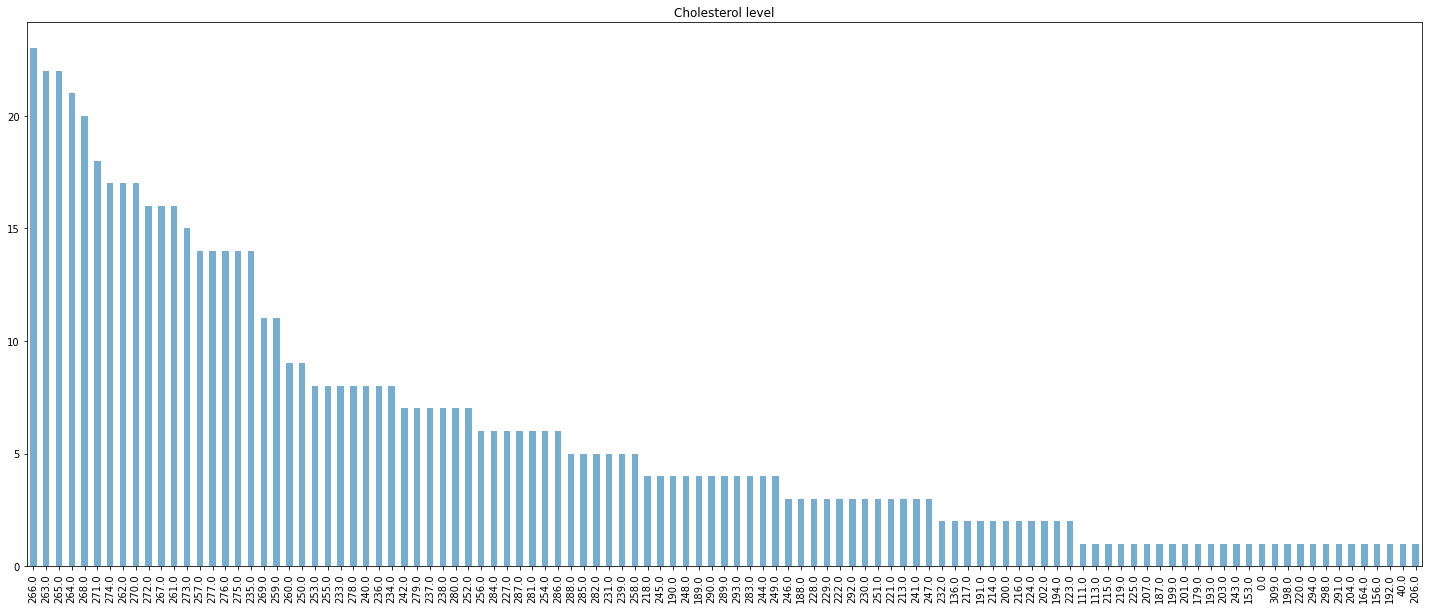

In [136]:
# Visualization of chalesterol level
df['Cholesterol'].value_counts().plot(kind='bar',alpha=0.6,figsize=(25,10))
plt.title("Cholesterol level")
plt.show()

In [137]:
# Average Cholesterol is
df['Cholesterol'].mean()

255.43605546995377

In [138]:
Cholesterol_W_BMI=df.groupby(by='Cholesterol').mean()
Cholesterol_W_BMI

,Weight,BMI
Cholesterol,,
0.0,28.000000,85.000000
40.0,207.000000,85.000000
111.0,191.000000,85.000000
113.0,33.000000,88.000000
136.0,132.000000,86.000000
...,...,...
292.0,214.333333,84.666667
293.0,213.750000,84.500000
294.0,216.000000,85.000000


- Here we see if Weight is high then Cholesterol level is also high

In [139]:
# Average BMI index is
df[['BMI']].mean()

BMI    86.625578
dtype: float64

In [140]:
df.groupby(by='BMI').mean()

,Weight,Cholesterol
BMI,,
84.0,207.928571,269.833333
85.0,205.305085,247.610169
86.0,207.067961,264.990291
87.0,201.865169,259.280899
88.0,202.038961,256.077922
89.0,201.915254,254.864407
90.0,204.437500,253.500000
91.0,213.500000,244.000000
94.0,214.333333,262.666667


In [141]:
# Splitting dataset into train,test,split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [142]:
# Checking the shape of data
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (519, 2)
Shape of X_test: (130, 2)
Shape of y_train: (519, 1)
Shape of y_test: (130, 1)


In [143]:
# To predict cholesterol by using Random Forest Regressor algo
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=5, max_depth=5,criterion='squared_error',random_state=10,
                           bootstrap=True)

rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

<ipython-input-143-bcfe580727f9>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [144]:
# Checking r2score and mean_squared_error
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)*100

56.83961364344161

In [145]:
# To predict cholesterol by using Linear Regressor algo
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [146]:
from sklearn.pipeline import make_pipeline

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.73 as r2_score

In [147]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(lr)
    pipe.fit(X_train,y_train)
    lr_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,lr_pred))

In [148]:
np.argmax(scores)

735

In [149]:
scores[np.argmax(scores)]

0.7365819458347393

#### The best model is found at a certain random state

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr = LinearRegression()
pipe=make_pipeline(lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)*100

73.65819458347393

In [79]:
# If we check cholesterol level by using some random number of weight and BMI. 
pred = lr.predict(np.array([[301,
                           86]]))
print('Prediction of cholesterol is:',pred)

Prediction of cholesterol is: [[332.84604028]]


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [75]:
# Prediction check by using all Weight and BMI
predict=lr.predict(np.array(df[['Weight','BMI']]))
                           
predict

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[252.23485508],
       [253.0415253 ],
       [242.55481245],
       [238.52146135],
       [245.78149333],
       [252.23485508],
       [251.42818486],
       [255.46153596],
       [256.26820618],
       [255.46153596],
       [256.26820618],
       [257.88154662],
       [255.46153596],
       [255.29402579],
       [256.10069601],
       [254.54319229],
       [252.87401513],
       [253.73652207],
       [253.68068535],
       [254.48735557],
       [255.29402579],
       [256.04485929],
       [257.76987317],
       [255.40569924],
       [250.56567792],
       [258.63238011],
       [257.76987317],
       [257.76987317],
       [259.38321361],
       [258.57654339],
       [256.96320295],
       [257.82570989],
       [259.43905033],
       [258.68821683],
       [258.52070667],
       [258.57654339],
       [256.90736623],
       [259.38321361],
       [253.7923588 ],
       [254.48735557],
       [256.26820618],
       [252.87401513],
       [148.81355686],
       [241

In [73]:
import pickle

In [74]:
pickle.dump(df.to_dict(),open('BMI_dict.pkl','wb'))